### Exercise: Traditional Image Feature Extraction
Read through the exercises and implement the solutions below. Feel free to reuse code from jupyter notebook 07_Traditional_Feature_Extraction

#### Exercise 1.1
The goal of this and the following exercise is to become more familiar with SIFT by visualizing keypoints.
First, let's compare the keypoints of an image to itself. This is how a perfect match would look like.

* Load any image from the "Data" folder
* Extract SIFT features from the image
* Visualize the keypoint mapping from the image to itself

(400, 400, 3)


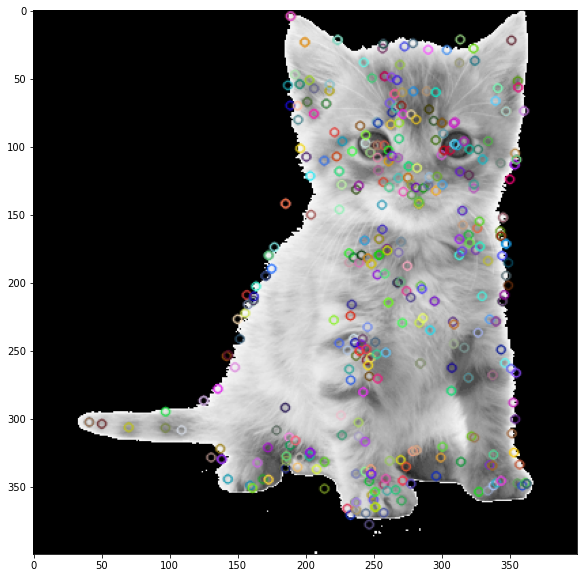

In [50]:
import os
import numpy as np
import cv2
from matplotlib import colors
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter

img = cv2.imread('./data/kitten6.jpg', cv2.IMREAD_COLOR)
print(img.shape)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
sift = cv2.xfeatures2d.SIFT_create()

# Detect keypoints and descriptors via SIFT
keypoints1, descriptors1 = sift.detectAndCompute(img, None) # 2

dspimg = cv2.drawKeypoints(gray,keypoints1,img)
plt.imshow(dspimg)

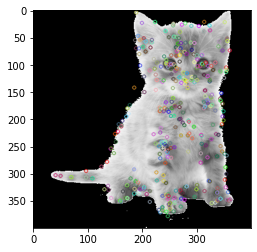

In [38]:
plt.imshow(img)

#### Exercise 1.2
Next, you will disort the image and investigate the change in the matched keypoints. The keypoints usually get much less compared to self-matching. However, there should still be many matching keypoints as SIFT is relatively invariant to rotations and resizing.

* Use the same image as in exercise 1.1
* Make a copy of the original image
* Rotate and rescale the copied image
* Extract SIFT features from the transformed image
* Map the keypoints of the original to the extracted keypoints of the disorted image

Key points detected in image 1:  392
Key points detected in image 2:  548
176


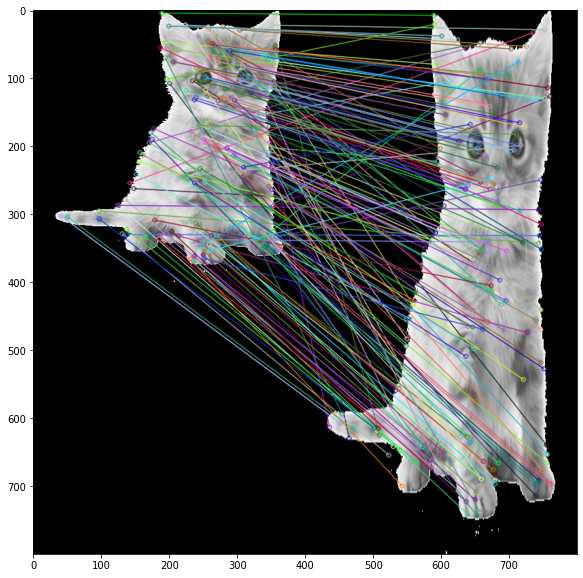

Number of matched key points:  176


In [51]:
img = cv2.imread('./data/kitten6.jpg', cv2.IMREAD_COLOR)

img2 =img.copy()
img2 = cv2.resize(img2, dsize=[400,800])
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
plt.imshow(img2)
sift = cv2.xfeatures2d.SIFT_create()

# Detect keypoints and descriptors via SIFT
keypoints2, descriptors2 = sift.detectAndCompute(img2, None) # 2

def display_keypoints(img1, img2, descriptors1, descriptors2, keypoints1, keypoints2, ratio_best_matches=1):
    """Display matched key points of two images"""

    # Display number of keypoints detected
    print("Key points detected in image 1: ", len(keypoints1))
    print("Key points detected in image 2: ", len(keypoints2))

    # Initialize brute force matcher
    matcher = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

    # Match descriptors of the two images
    matches = matcher.match(descriptors1, descriptors2)

    # Order matches by distance
    matches = sorted(matches, key=lambda x : x.distance)

    # Remove worst matches
    num_best_matches = int(round(len(matches) * ratio_best_matches, 0))
    print(num_best_matches)
    matches = matches[:num_best_matches]

    # Create drawing of matched key points
    result = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches, img2, flags = 2)

    # Display the best matching points
    plt.rcParams["figure.figsize"] = [20.0, 10.0]
    plt.imshow(result)
    plt.show()

    # Display number of matched key points
    print("Number of matched key points: ", len(matches))
display_keypoints(gray, gray2, descriptors1, descriptors2,keypoints1,keypoints2)

#### Exercise 1.3
Lastly, compare to different but semantically similar images.

* Load the files "kitten1.png" and "kitten5.png" from the data folder
* Extract SIFT features from both images
* Visualize the matched keypoints

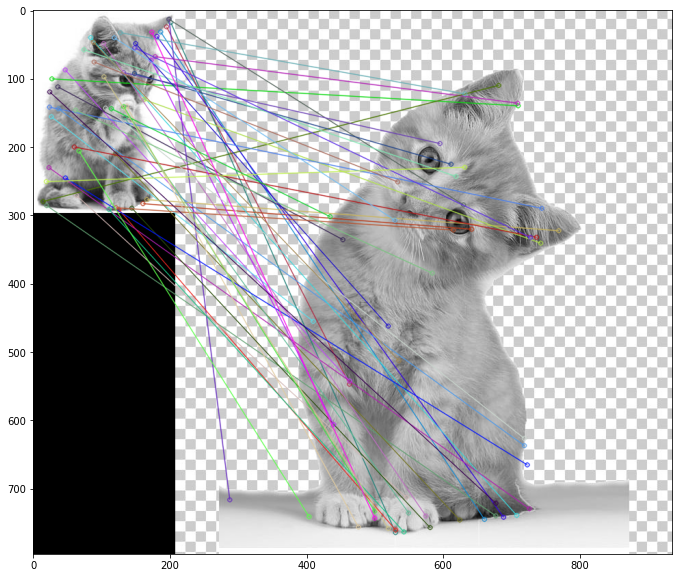

(<matplotlib.image.AxesImage at 0x1b381010f10>, None)

In [54]:
img1 = cv2.imread('./data/kitten1.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('./data/kitten5.jpg', cv2.IMREAD_GRAYSCALE)

sift = cv2.xfeatures2d.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(img1, None) # 2
keypoints2, descriptors2 = sift.detectAndCompute(img2, None) # 2

#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors1,descriptors2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:50], img2, flags=2)
plt.imshow(img3),plt.show()